In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs2/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs2/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band04_wn_800_980',
                          'ng_12',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_12',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_none',
                          'crd_a3d1611',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band04_wn_800_980',
                          'ng_12',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_12',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_none',
                          'crd_a3d1611',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 800

nband = 180

nv = 200

dv = 0.005

tsfc = 294.0

ng = 12

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 12 /)

data wgt
     &     /12*1/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 1e-24

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

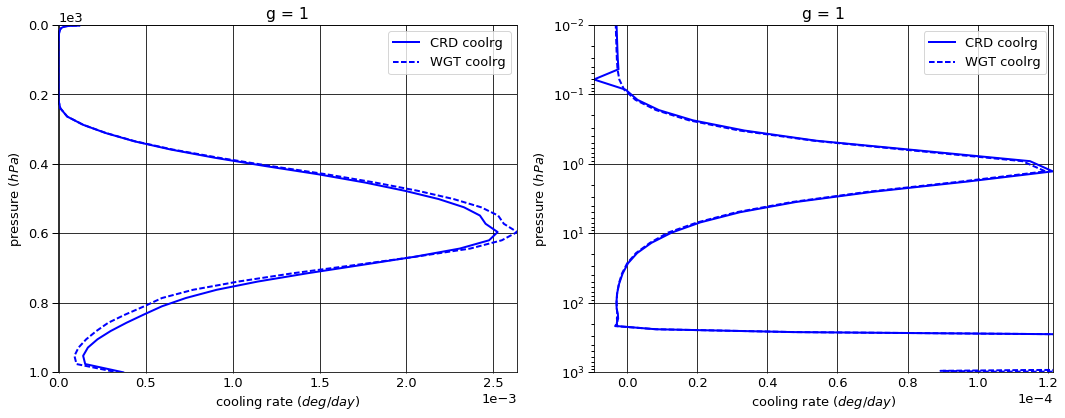

# Figure: cooling rate g-group 2

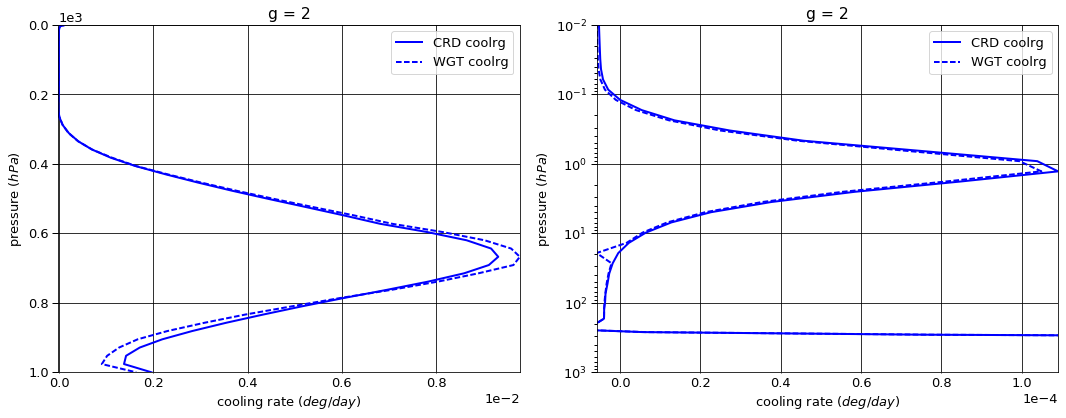

# Figure: cooling rate g-group 3

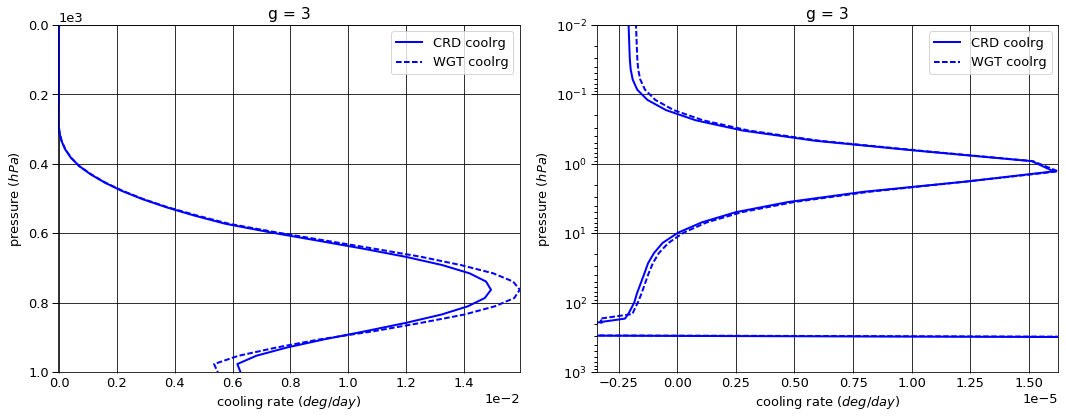

# Figure: cooling rate g-group 4

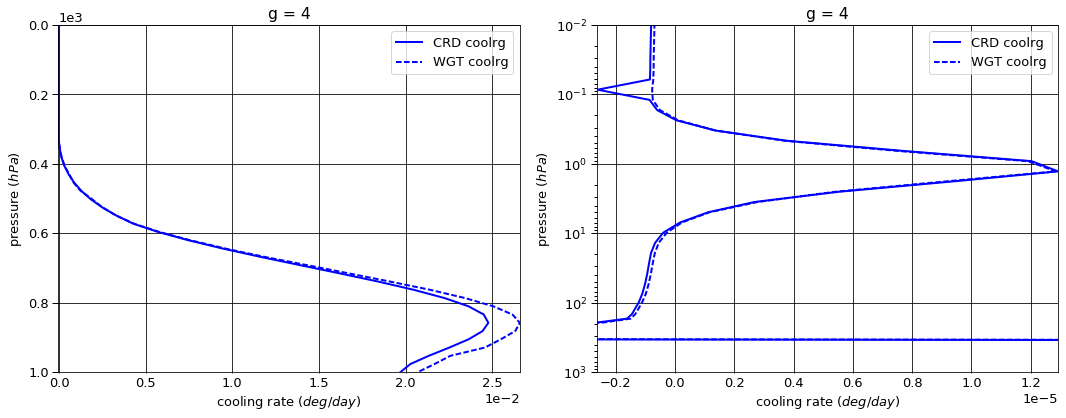

# Figure: cooling rate g-group 5

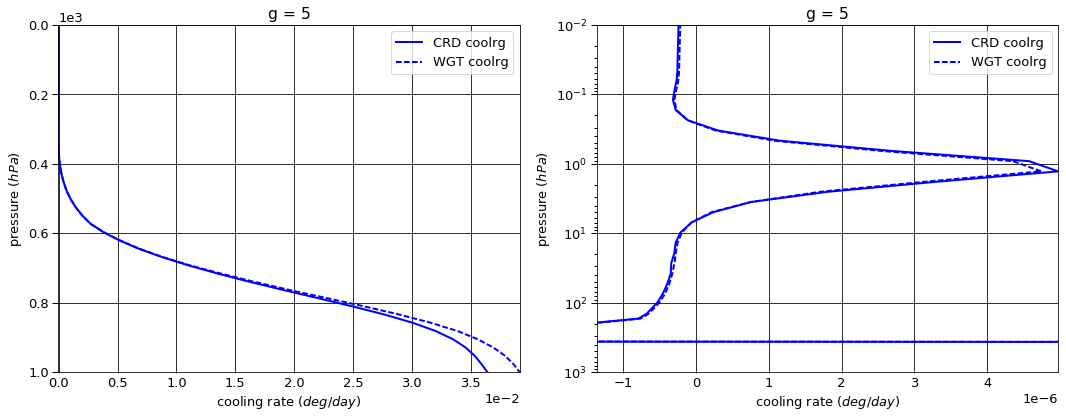

# Figure: cooling rate g-group 6

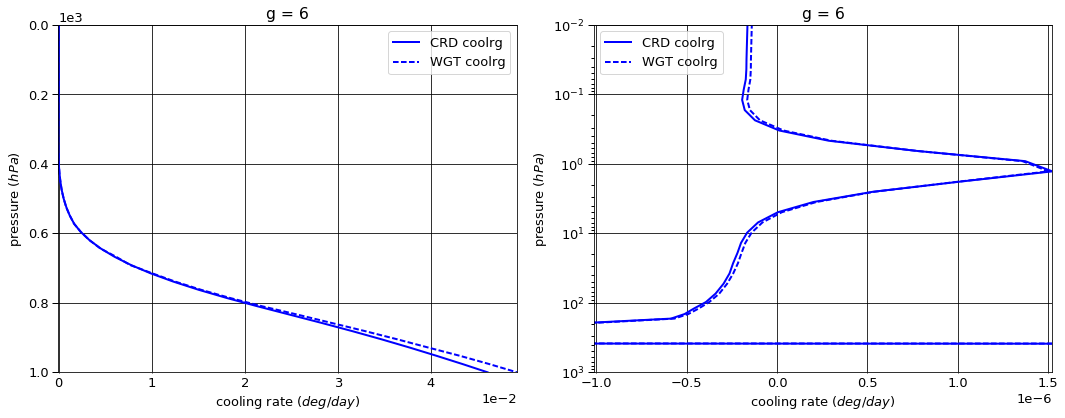

# Figure: cooling rate g-group 7

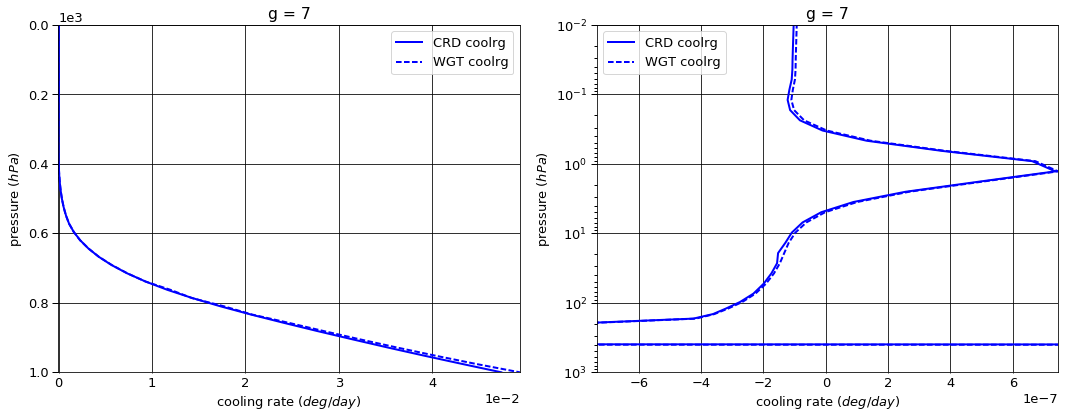

# Figure: cooling rate g-group 8

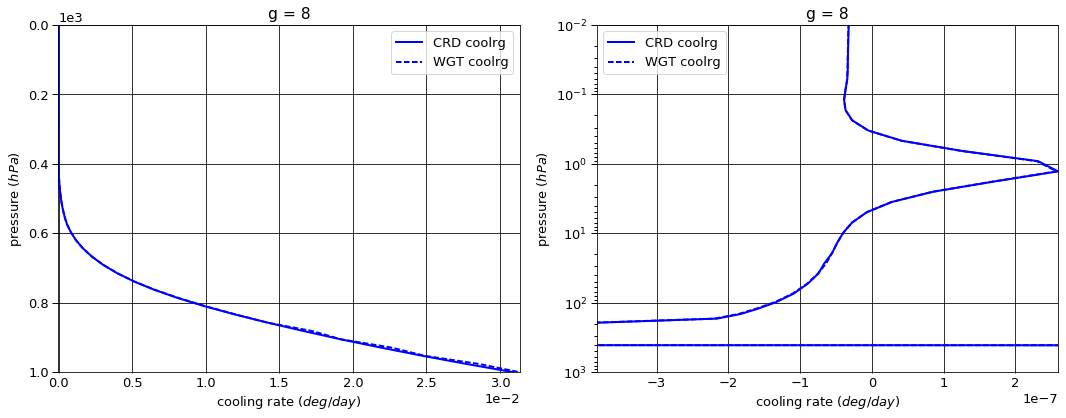

# Figure: cooling rate g-group 9

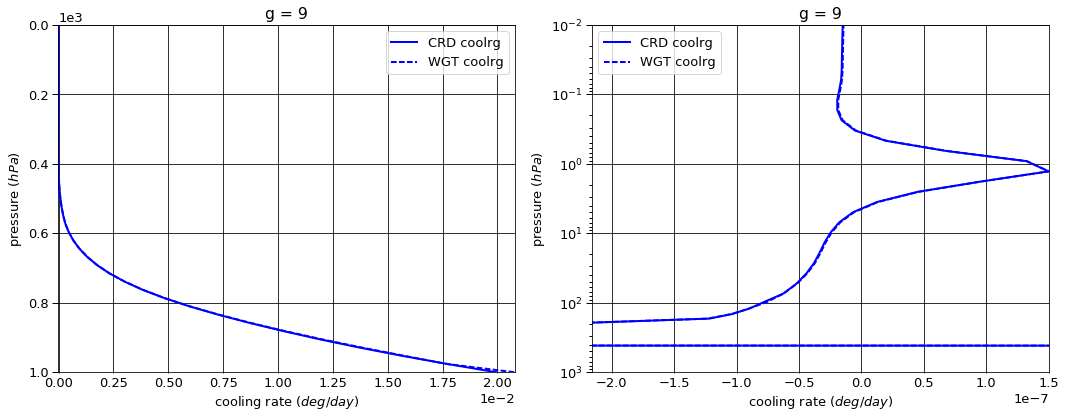

# Figure: cooling rate g-group 10

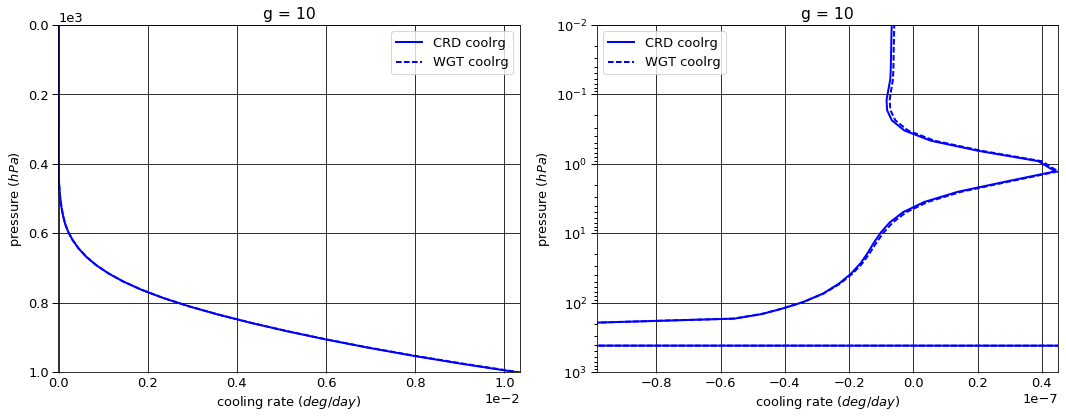

# Figure: cooling rate g-group 11

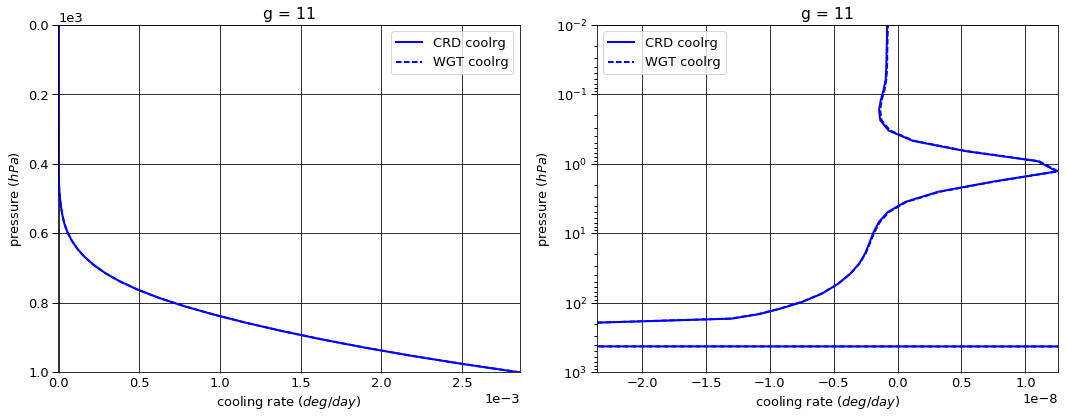

# Figure: cooling rate g-group 12

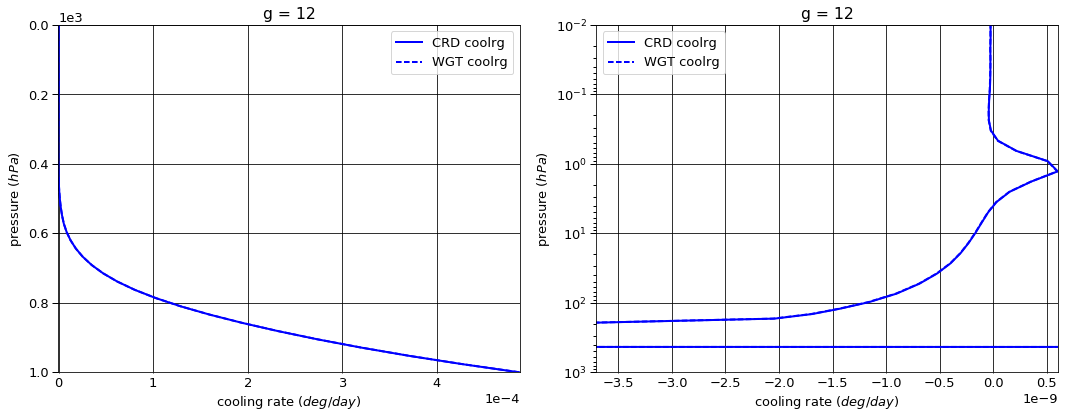

# Figure: cooling rate g-group total

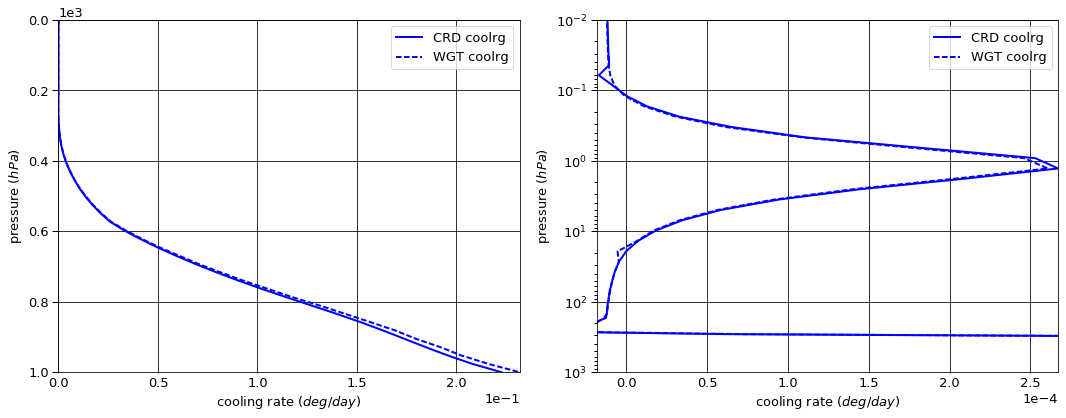

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g  pressure level                                
1  0.0      1      -0.103814  0.000000  -0.103814
   1013.0   76     -0.170413  0.169084  -0.001329
2  0.0      1      -0.385852  0.000000  -0.385852
   1013.0   76     -0.556875  0.547198  -0.009676
3  0.0      1      -0.672357  0.000000  -0.672357
   1013.0   76     -0.855929  0.802780  -0.053149
4  0.0      1      -1.253518  0.000000  -1.253518
   1013.0   76     -1.454568  1.173661  -0.280906
5  0.0      1      -2.064614  0.000000  -2.064614
   1013.0   76     -2.242293  1.318075  -0.924218
6  0.0      1      -3.553842  0.000000  -3.553842
   1013.0   76     -3.698714  1.250431  -2.448283
7  0.0      1      -6.527039  0.000000  -6.527039
   1013.0   76     -6.640998  1.096585  -5.544413
8  0.0      1      -8.341499  0.000000  -8.341499
   1013.0   76     -8.407192  0.661580  -7.745612
9  0.0      1     -11.667776  0.000000 -11.667776
   1013.0   76    -11.707421  0.408467 -11.298954
10 0.0      1     -14.080073  0.000000 -14.080073
   1013.0   76    -14.099365  0.204412 -13.894954
11 0.0      1      -8.409816  0.000000  -8.409816
   1013.0   76     -8.415123  0.055625  -8.359498
12 0.0      1      -3.431464  0.000000  -3.431464
   1013.0   76     -3.432356  0.009331  -3.423025


WGT


flug      fldg      fnetg
g  pressure level                                
1  0.0      1      -0.102789  0.000000  -0.102789
   1013.0   76     -0.170413  0.169383  -0.001030
2  0.0      1      -0.382280  0.000000  -0.382280
   1013.0   76     -0.556875  0.550477  -0.006398
3  0.0      1      -0.666557  0.000000  -0.666557
   1013.0   76     -0.855929  0.825565  -0.030364
4  0.0      1      -1.246576  0.000000  -1.246576
   1013.0   76     -1.454568  1.233402  -0.221165
5  0.0      1      -2.059280  0.000000  -2.059280
   1013.0   76     -2.242293  1.380767  -0.861526
6  0.0      1      -3.550532  0.000000  -3.550532
   1013.0   76     -3.698714  1.301715  -2.396999
7  0.0      1      -6.525886  0.000000  -6.525886
   1013.0   76     -6.640998  1.121678  -5.519320
8  0.0      1      -8.341020  0.000000  -8.341020
   1013.0   76     -8.407192  0.670264  -7.736928
9  0.0      1     -11.667781  0.000000 -11.667781
   1013.0   76    -11.707421  0.412243 -11.295177
10 0.0      1     -14.080108  0.000000 -14.080108
   1013.0   76    -14.099365  0.205056 -13.894309
11 0.0      1      -8.409804  0.000000  -8.409804
   1013.0   76     -8.415123  0.055676  -8.359446
12 0.0      1      -3.431463  0.000000  -3.431463
   1013.0   76     -3.432356  0.009335  -3.423021


WGT - CRD


flug      fldg         fnetg
g  pressure level                                      
1  0.0      1      1.025490e-03  0.000000  1.025490e-03
   1013.0   76     0.000000e+00  0.000299  2.988867e-04
2  0.0      1      3.571220e-03  0.000000  3.571220e-03
   1013.0   76     0.000000e+00  0.003278  3.278173e-03
3  0.0      1      5.800630e-03  0.000000  5.800630e-03
   1013.0   76     0.000000e+00  0.022785  2.278484e-02
4  0.0      1      6.942400e-03  0.000000  6.942400e-03
   1013.0   76     0.000000e+00  0.059741  5.974131e-02
5  0.0      1      5.333900e-03  0.000000  5.333900e-03
   1013.0   76     0.000000e+00  0.062692  6.269225e-02
6  0.0      1      3.309900e-03  0.000000  3.309900e-03
   1013.0   76     0.000000e+00  0.051284  5.128390e-02
7  0.0      1      1.152500e-03  0.000000  1.152500e-03
   1013.0   76     0.000000e+00  0.025093  2.509310e-02
8  0.0      1      4.791000e-04  0.000000  4.791000e-04
   1013.0   76     0.000000e+00  0.008684  8.684300e-03
9  0.0      1     -5.000000e-06  0.000000 -5.000000e-06
   1013.0   76     0.000000e+00  0.003777  3.777000e-03
10 0.0      1     -3.500000e-05  0.000000 -3.500000e-05
   1013.0   76     0.000000e+00  0.000644  6.450000e-04
11 0.0      1      1.230000e-05  0.000000  1.230000e-05
   1013.0   76     0.000000e+00  0.000051  5.110000e-05
12 0.0      1      4.000000e-07  0.000000  4.000000e-07
   1013.0   76     0.000000e+00  0.000004  3.800000e-06

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -3.508757e-06
   1001.112500 75     3.699579e-04
2  0.000312    1     -5.754842e-06
   1001.112500 75     1.962094e-03
3  0.000312    1     -2.161536e-06
   1001.112500 75     6.274580e-03
4  0.000312    1     -7.252714e-07
   1001.112500 75     1.969492e-02
5  0.000312    1     -2.069065e-07
   1001.112500 75     3.644293e-02
6  0.000312    1     -1.500178e-07
   1001.112500 75     4.609548e-02
7  0.000312    1     -9.409588e-08
   1001.112500 75     4.739994e-02
8  0.000312    1     -2.946800e-08
   1001.112500 75     3.094219e-02
9  0.000312    1     -1.359323e-08
   1001.112500 75     1.996366e-02
10 0.000312    1     -6.100141e-09
   1001.112500 75     1.028364e-02
11 0.000312    1     -6.484402e-10
   1001.112500 75     2.853633e-03
12 0.000312    1     -1.801223e-11
   1001.112500 75     4.871084e-04


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -3.672209e-06
   1001.112500 75     3.354288e-04
2  0.000312    1     -6.201070e-06
   1001.112500 75     1.639184e-03
3  0.000312    1     -1.857654e-06
   1001.112500 75     5.488866e-03
4  0.000312    1     -6.178554e-07
   1001.112500 75     2.068935e-02
5  0.000312    1     -1.842471e-07
   1001.112500 75     3.918647e-02
6  0.000312    1     -1.275626e-07
   1001.112500 75     4.925318e-02
7  0.000312    1     -8.483759e-08
   1001.112500 75     4.938206e-02
8  0.000312    1     -2.987628e-08
   1001.112500 75     3.135097e-02
9  0.000312    1     -1.282471e-08
   1001.112500 75     2.080617e-02
10 0.000312    1     -5.355636e-09
   1001.112500 75     1.034536e-02
11 0.000312    1     -6.484402e-10
   1001.112500 75     2.858562e-03
12 0.000312    1     -1.801223e-11
   1001.112500 75     4.874895e-04


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -1.634512e-07
   1001.112500 75    -3.452910e-05
2  0.000312    1     -4.462275e-07
   1001.112500 75    -3.229101e-04
3  0.000312    1      3.038827e-07
   1001.112500 75    -7.857135e-04
4  0.000312    1      1.074159e-07
   1001.112500 75     9.944280e-04
5  0.000312    1      2.265938e-08
   1001.112500 75     2.743538e-03
6  0.000312    1      2.245524e-08
   1001.112500 75     3.157701e-03
7  0.000312    1      9.258285e-09
   1001.112500 75     1.982125e-03
8  0.000312    1     -4.082770e-10
   1001.112500 75     4.087740e-04
9  0.000312    1      7.685220e-10
   1001.112500 75     8.425050e-04
10 0.000312    1      7.445055e-10
   1001.112500 75     6.171900e-05
11 0.000312    1      0.000000e+00
   1001.112500 75     4.928400e-06
12 0.000312    1      0.000000e+00
   1001.112500 75     3.810300e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.491664,0.000000,-60.491664
1013.0,76,-61.681246,7.697229,-53.984018



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.464077,0.000000,-60.464077
1013.0,76,-61.681246,7.935562,-53.745684



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.027588,0.000000,0.027588
1013.0,76,0.000000,0.238333,0.238334


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000013
1001.112500,75,0.222770



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000013
1001.112500,75,0.231823



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-1.429024e-07
1001.112500,75,9.052947e-03


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.002583,0.002859
2,0.008556,0.009281
3,0.013333,0.014166
4,0.023028,0.023886
5,0.035556,0.036791
6,0.059250,0.060374
7,0.104806,0.109315
8,0.135056,0.137031
9,0.189583,0.189879


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,5.674102e-23
2,2.268549e-23
3,9.069832e-24
4,3.626188e-24
5,1.449778e-24
6,5.796321e-25
7,2.317413e-25
8,9.265195e-26
9,3.704295e-26


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [12]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,5.674102e-23,NaN,0.002583,0.002859,0.002583,0.002859,600.0
2,2.268549e-23,0.399808,0.008556,0.009281,0.011139,0.012140,600.0
3,9.069832e-24,0.399808,0.013333,0.014166,0.024472,0.026307,600.0
4,3.626188e-24,0.399808,0.023028,0.023886,0.047500,0.050193,600.0
5,1.449778e-24,0.399808,0.035556,0.036791,0.083056,0.086983,600.0
6,5.796321e-25,0.399808,0.059250,0.060374,0.142306,0.147357,600.0
7,2.317413e-25,0.399808,0.104806,0.109315,0.247111,0.256672,600.0
8,9.265195e-26,0.399808,0.135056,0.137031,0.382167,0.393703,600.0
9,3.704295e-26,0.399808,0.189583,0.189879,0.571750,0.583583,600.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                     
1     1      0.000312  5.176645e-23  5.800425e-24   8.924596
      2      0.000312  1.812943e-23  9.976136e-25  18.172799
      3      0.000312  2.598891e-24  1.676158e-25  15.505049
      4      0.000312  4.117627e-25  6.113305e-26   6.735518
      5      0.000312  6.911639e-26  1.375993e-26   5.023021
      6      0.000312  2.622773e-26  3.600334e-27   7.284804
      7      0.000312  9.285706e-27  1.598202e-27   5.810094
      8      0.000312  2.471953e-27  4.223774e-28   5.852474
      9      0.000312  7.500064e-28  1.788921e-28   4.192508
      10     0.000312  2.587954e-28  6.452876e-29   4.010544
      11     0.000312  4.985479e-29  1.646573e-29   3.027791
      12     0.000312  4.354622e-30  3.085594e-30   1.411275
2     1      0.000750  5.222673e-23  5.818926e-24   8.975322
      2      0.000750  1.825509e-23  9.996955e-25  18.260654
      3      0.000750  2.610863e-24  1.683499e-25  15.508553
      4      0.000750  4.167376e-25  6.130058e-26   6.798266
      5      0.000750  7.006016e-26  1.382392e-26   5.068039
      6      0.000750  2.647875e-26  3.619419e-27   7.315747
      7      0.000750  9.374705e-27  1.606343e-27   5.836056
      8      0.000750  2.494047e-27  4.249638e-28   5.868846
      9      0.000750  7.573997e-28  1.802983e-28   4.200815
      10     0.000750  2.612271e-28  6.491578e-29   4.024093
      11     0.000750  5.052114e-29  1.661008e-29   3.041595
      12     0.000750  4.401660e-30  3.113789e-30   1.413603
3     1      0.001052  5.321437e-23  5.857223e-24   9.085257
      2      0.001052  1.852546e-23  1.003911e-24  18.453283
      3      0.001052  2.636603e-24  1.698773e-25  15.520625
      4      0.001052  4.274913e-25  6.164582e-26   6.934636
      5      0.001052  7.210749e-26  1.395809e-26   5.166001
      6      0.001052  2.702030e-26  3.659481e-27   7.383644
      7      0.001052  9.566406e-27  1.623402e-27   5.892812
      8      0.001052  2.541615e-27  4.303769e-28   5.905556
      9      0.001052  7.733192e-28  1.832737e-28   4.219478
      10     0.001052  2.664563e-28  6.572831e-29   4.053905
      11     0.001052  5.196320e-29  1.691583e-29   3.071869
      12     0.001052  4.501630e-30  3.173052e-30   1.418707
4     1      0.001476  5.427744e-23  5.898276e-24   9.202255
      2      0.001476  1.881637e-23  1.008330e-24  18.660918
      3      0.001476  2.664225e-24  1.714867e-25  15.536046
      4      0.001476  4.391666e-25  6.200674e-26   7.082562
      5      0.001476  7.434151e-26  1.410006e-26   5.272425
      6      0.001476  2.760671e-26  3.702334e-27   7.456569
      7      0.001476  9.773672e-27  1.641537e-27   5.953975
      8      0.001476  2.593041e-27  4.361411e-28   5.945419
      9      0.001476  7.905750e-28  1.864708e-28   4.239673
      10     0.001476  2.721156e-28  6.659787e-29   4.085951
      11     0.001476  5.353659e-29  1.724482e-29   3.104503
      12     0.001476  4.610575e-30  3.237687e-30   1.424034
5     1      0.002070  5.535986e-23  5.940002e-24   9.319838
      2      0.002070  1.911241e-23  1.012726e-24  18.872243
      3      0.002070  2.692258e-24  1.730918e-25  15.553934
      4      0.002070  4.511592e-25  6.236420e-26   7.234266
      5      0.002070  7.664820e-26  1.424227e-26   5.381740
      6      0.002070  2.820750e-26  3.745792e-27   7.530451
      7      0.002070  9.985688e-27  1.659791e-27   6.016231
      8      0.002070  2.645647e-27  4.419536e-28   5.986255
      9      0.002070  8.082767e-28  1.897225e-28   4.260311
      10     0.002070  2.779118e-28  6.747948e-29   4.118464
      11     0.002070  5.516141e-29  1.758009e-29   3.137720
      12     0.002070  4.723121e-30  3.304587e-30   1.429262
6     1      0.002904  5.646101e-23  5.982501e-24   9.437693
      2      0.002904  1.941334e-23  1.017114e-24  19.086683
      3      0.002904  2.720679e-24  1.746939e-25  15.573979
      4      0.002904  4.634657e-25  6.271889e-2

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
